# TP2 - Méthode des A-NN

## Introduction
Dans le cadre des TP d'apprentissage supervisé, nous avons experimenté des méthodes de classification en utilisant des A-NN (Réseaux de neurones artificiels). Ces expériementations nous ont permis de trouver différents avantages et désavantages aux méthodes d'A-NN.

In [54]:
from sklearn.datasets import fetch_openml
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import zero_one_loss
import matplotlib.pyplot as plt
import numpy as np
import random
import time
import statistics

## Travail à effectuer
Dans ce TP, nous expérimentons la création de réseaux de neurones artificiels (A-NN) avec divers paramètres. Afin de réduire les temps d'apprentissage, nous entrainons nos réseaux avec 10 000 images, et les testons sur 5000.

In [2]:
# Chargement du dataset MNIST
X, Y = fetch_openml('mnist_784', return_X_y = True, as_frame = False) 

# 10000 Données pour l'entrainement
training_data = X[:10000]
training_target = Y[:10000]

# 5000 autres données sont utilisées pour les tests
test_data = X[10000:15000]
test_target = Y[10000:15000]


Classe de l'image: 9


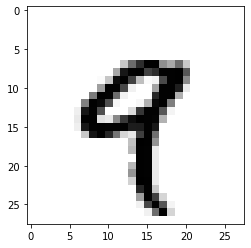

In [3]:
# Test de l'affichage et de la classe de l'image n°4
plt.imshow(X[4].reshape(28, 28), cmap=plt.cm.gray_r,interpolation="nearest")
print(f"Classe de l'image: {Y[4]}")
plt.show() 

In [4]:
# Modèles de classification

# Modèle avec hidden_layer_sizes = (50), soit 1 couche cachée de 50 Neurones
Classifier_50 = MLPClassifier(hidden_layer_sizes =  (50), verbose=False).fit(training_data, training_target)

In [5]:
# Prédiction de l'image n°4 du test set avec le modèle entrainé
expected4 = test_target[4]
predicted4 = Classifier_50.predict(test_data)[4]
print(f"Expected class: {expected4}")
print(f"Predicted class of image n°4: {predicted4}")
if expected4 == predicted4:
    print("Success")
else:
    print("Failure")

Expected class: 9
Predicted class of image n°4: 9
Success


In [6]:
# Précision du model sur le test set
accuracy = precision_score(test_target, Classifier_50.predict(test_data), average=None)

print(f"Précision du modèle par label [0-9]: {accuracy}")

Précision du modèle par label [0-9]: [0.97457627 0.95478261 0.89542484 0.87169811 0.90851064 0.92147806
 0.93868922 0.94038462 0.78782288 0.85931559]


On peut voir que le modèle avec une seule couche cachée présente une bonne accuracy. En effet, elle atteint 97% sur le chiffre 0, et ne tombe qu'à 78% pour le chiffre 8. Les autres sont entre 85% et 95%

In [12]:
# Variation de 10 à 100 couches cachées de 25 neurones chacune

#max (n_hidden_layer, accuracy) tuple
max_accuracy = (0,0)

# Nombre de neurones par couche
neuron_number = 25
for i in range(10, 101, 10):
    
    hidden_layer_s = []
    for _ in range (0, i):
        hidden_layer_s.append(neuron_number)
    
    print(f"hidden_layer_size = {len(hidden_layer_s)}", flush=True)
    Classifier_n = MLPClassifier(hidden_layer_sizes =  hidden_layer_s).fit(training_data, training_target)
    accuracy = precision_score(test_target, Classifier_n.predict(test_data), average="micro")
    print(f"Accuracy = {accuracy}")
    if(accuracy > max_accuracy[0]):
        max_accuracy = (accuracy, i)
print(f"Max accuracy: {max_accuracy[0]} for {max_accuracy[1]} hidden layers")

hidden_layer_size = 10
Accuracy = 0.911
hidden_layer_size = 20
Accuracy = 0.907
hidden_layer_size = 30
Accuracy = 0.9206
hidden_layer_size = 40
Accuracy = 0.6816
hidden_layer_size = 50
Accuracy = 0.1126
hidden_layer_size = 60
Accuracy = 0.1126
hidden_layer_size = 70
Accuracy = 0.1126
hidden_layer_size = 80
Accuracy = 0.1126
hidden_layer_size = 90
Accuracy = 0.1126
hidden_layer_size = 100
Accuracy = 0.1126
Max accuracy: 0.9206 for 30 hidden layers


Nous pouvons remarquer qu'avec plus de 30 couches cachées de 25 neurones, le model commence à sur-apprendre. Cela veut dire que le model ne reconnait pas les images, mais apprend le training set par coeur. Cela rend donc le modèle inutilisable.

In [13]:
# 5 modèles de classification, avec [1 ; 10] couches cachées
# chacune avec [10 ; 300] neurones (choisis aléatoirement) 

# Nombre de neurones par couche
neuron_number = random.randint(10,300)
print(f"Nombre de neurones par couche: {neuron_number}\n")


# Génération de 5 modèles
Classifier_models = []
for i in range(0,10, 2):
    print(f"Modèle n° {round(i/2 + 1)}", flush=True)
    hidden_layer_s = []
    for j in range (0, i+1):
        hidden_layer_s.append(neuron_number)
    print(f"hidden_layer_size = {len(hidden_layer_s)}", flush=True)
    
    ##### Temps d'apprentissage ####
    start_time = time.time()
    Classifier_n = MLPClassifier(hidden_layer_sizes =  hidden_layer_s).fit(training_data, training_target)
    print(f"-------- Temps d'apprentissage: {time.time() - start_time}s --------")

    
    accuracy = precision_score(test_target, Classifier_n.predict(test_data), average="micro")
    Classifier_models.append(Classifier_n)
    print("\n")

Nombre de neurones par couche: 123

Modèle n° 1
hidden_layer_size = 1
-------- Temps d'apprentissage: 4.8645241260528564s --------


Modèle n° 2
hidden_layer_size = 3
-------- Temps d'apprentissage: 7.03551173210144s --------


Modèle n° 3
hidden_layer_size = 5
-------- Temps d'apprentissage: 10.689053058624268s --------


Modèle n° 4
hidden_layer_size = 7
-------- Temps d'apprentissage: 17.589107751846313s --------


Modèle n° 5
hidden_layer_size = 9
-------- Temps d'apprentissage: 19.80100440979004s --------




In [14]:
# Accuracy des 5 modèles
i = 1
for Classifier in Classifier_models:
    print(f"--- Modèle n° {i} ---")
    accuracy = precision_score(test_target, Classifier.predict(test_data), average=None)
    print(f"Accuracy par label [0-9]: {accuracy}")
    print(f"Accuracy moyenne: {statistics.mean(accuracy)}")
    print("----------------\n")
    i += 1

--- Modèle n° 1 ---
Accuracy par label [0-9]: [0.97058824 0.96296296 0.85826772 0.87951807 0.90756303 0.88085106
 0.902      0.94011976 0.88470067 0.83725136]
Accuracy moyenne: 0.9023822858027751
----------------

--- Modèle n° 2 ---
Accuracy par label [0-9]: [0.94887526 0.93686007 0.88008565 0.86626747 0.88085938 0.87810384
 0.93081761 0.91254753 0.84317719 0.86614173]
Accuracy moyenne: 0.8943735714802513
----------------

--- Modèle n° 3 ---
Accuracy par label [0-9]: [0.95731707 0.97513321 0.85480573 0.88439306 0.92040816 0.91028446
 0.94327731 0.94129159 0.873706   0.90384615]
Accuracy moyenne: 0.9164462758844774
----------------

--- Modèle n° 4 ---
Accuracy par label [0-9]: [0.98962656 0.92821369 0.90631365 0.89648799 0.92215569 0.96171171
 0.97441365 0.9740519  0.92608696 0.9296875 ]
Accuracy moyenne: 0.9408749275452046
----------------

--- Modèle n° 5 ---
Accuracy par label [0-9]: [0.96806387 0.97354497 0.95364238 0.9        0.95491803 0.87374749
 0.96443515 0.96168582 0.899371

On remarque que le modèle ayant la meilleure accuracy est le modèle est le Modèle 3, avec 5 couches cachées. Cependant, si l'on fait un rapport temps d'apprentissage / performance, le meilleur modèle est le Modèle 1, avec une seule couche cachée (~ 3x moins de temps d'apprentissage que le modèle 3, pour environ 1.06x moins d'accuracy).

Nous allons maintenant expérimenter plusieurs algorithmes d'optimisation (L-BFSG, SGD, ADAM), avec plusieurs fonctions d'activation (relu et tanh) et paramètres alpha. Cela nous permettra de trouver de bons paramètres pour notre cas de classification de chiffres manuscrits.

In [18]:
# Comparaison des différents algorithmes d'optimisation

# Création des paramètres des modèles

# Séléction du nombre de neurones par couche
neuron_number = random.randint(10,300)
print(f"Nombre de neurones par layer: {neuron_number}\n")

# Remplissage des layers
layer_number = 10
hidden_layer_s = []
for i in range (0, layer_number+1):
    hidden_layer_s.append(neuron_number)


Nombre de neurones par layer: 15



In [22]:
activations = ["tanh", "relu"]
alphas = [0.0001, 0.001, 0.01, 0.1]

#### Impossible d'utiliser les fonctions d'activation "identity" et "logistic".

Entrainement de plusieurs classifiers en utilisant l'optimisation L-BFSG:

In [ ]:
times_BFSG = []
classifiers_BFSG = []
accuracy_BFSG = []
print("L-BFSG Classifier")
for activation in activations:
    times = []
    classifiers = []
    for alpha in alphas:
        start_time = time.time()
        Classifier_BFSG = MLPClassifier(activation=activation, alpha=alpha, hidden_layer_sizes =  hidden_layer_s, solver = "lbfgs", verbose=False).fit(training_data, training_target)
        times.append(time.time()-start_time)
        classifiers.append(Classifier_BFSG)
    times_BFSG.append(times)
    classifiers_BFSG.append(classifiers)

#### Le modèle ne converge pas avec l'optimisation BFGS. On l'ignore pour la suite du TP. 

Entrainement de plusieurs classifiers en utilisant l'optimisation SGD:

In [23]:
times_SGD = []
classifiers_SGD = []
print("SGD Classifier")
for activation in activations:
    times = []
    classifiers = []
    for alpha in alphas:
        start_time = time.time()
        Classifier_SGD = MLPClassifier(activation=activation, alpha=alpha, hidden_layer_sizes =  hidden_layer_s, solver = "sgd", verbose=False).fit(training_data, training_target)
        times.append(time.time()-start_time)
        classifiers.append(Classifier_SGD)
    times_SGD.append(times)
    classifiers_SGD.append(classifiers)
    print(f"{activation} OK\n")

SGD Classifier
tanh OK



/home/pierre/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


relu OK



Entrainement de plusieurs classifiers en utilisant l'optimisation ADAM:

In [24]:
times_ADAM = []
classifiers_ADAM = []
print("ADAM Classifier")
for activation in activations:
    times = []
    classifiers = []
    for alpha in alphas:
        start_time = time.time()
        Classifier_ADAM = MLPClassifier(activation=activation, alpha=alpha, hidden_layer_sizes =  hidden_layer_s, solver = "adam", verbose=False).fit(training_data, training_target)
        times.append(time.time()-start_time)
        classifiers.append(Classifier_ADAM)
    times_ADAM.append(times)
    classifiers_ADAM.append(classifiers)
    print(f"{activation} OK\n")

ADAM Classifier
tanh OK

relu OK



On calcul maintenant l'accuracy, le recall et l'erreur de chaque classifiers. Dans notre cas d'utilisation, le recall et l'accuracy devraient être les mêmes.

In [61]:
# Accuracy / Recall pour SGD et ADAM (multiples paramètres)
accuracy_SGD = []
recall_SGD = []
error_SGD = []

for classifiers in classifiers_SGD:
    accuracy = []
    recall = []
    error = []
    for classifier in classifiers:
        pred = classifier.predict(test_data)
        accuracy.append(classifier.score(test_data, test_target))
        recall.append(recall_score(test_target, pred, average='macro'))
        error.append(zero_one_loss(test_target, pred))
    accuracy_SGD.append(accuracy)
    recall_SGD.append(recall)
    error_SGD.append(error)
    
accuracy_ADAM = []
recall_ADAM = []
error_ADAM = []

for classifiers in classifiers_ADAM:
    accuracy = []
    recall = []
    error = []
    for classifier in classifiers:
        pred = classifier.predict(test_data)
        accuracy.append(classifier.score(test_data, test_target))
        recall.append(recall_score(test_target, pred, average='macro'))
        error.append(zero_one_loss(test_target, pred))
    accuracy_ADAM.append(accuracy)
    recall_ADAM.append(recall)
    error_ADAM.append(error)

 On regarde et compare les caractéristiques de nos réseaux entrainés 

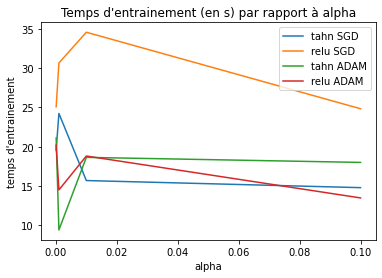

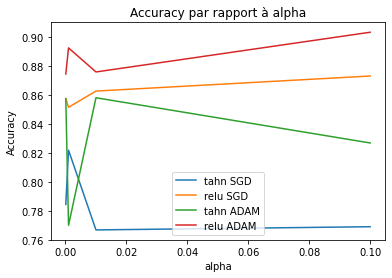

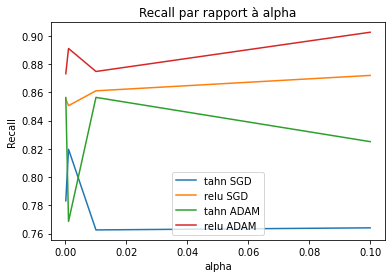

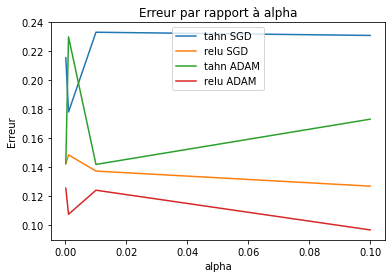

In [68]:
# Plots SGD 
## Plots SGD Temps / Alpha
plt.figure()
plt.plot(alphas, times_SGD[0], label="tahn SGD")
plt.plot(alphas, times_SGD[1], label="relu SGD")
plt.plot(alphas, times_ADAM[0], label="tahn ADAM")
plt.plot(alphas, times_ADAM[1], label="relu ADAM")
plt.xlabel("alpha")
plt.ylabel("temps d'entrainement")
plt.title("Temps d'entrainement (en s) par rapport à alpha")
plt.legend()
plt.show()

## Plots Accuracy / Alpha
plt.figure()
plt.plot(alphas, accuracy_SGD[0], label="tahn SGD")
plt.plot(alphas, accuracy_SGD[1], label="relu SGD")
plt.plot(alphas, accuracy_ADAM[0], label="tahn ADAM")
plt.plot(alphas, accuracy_ADAM[1], label="relu ADAM")
plt.xlabel("alpha")
plt.ylabel("Accuracy")
plt.title("Accuracy par rapport à alpha")
plt.legend()
plt.show()

## Plots Recall / Alpha
plt.figure()
plt.plot(alphas, recall_SGD[0], label="tahn SGD")
plt.plot(alphas, recall_SGD[1], label="relu SGD")
plt.plot(alphas, recall_ADAM[0], label="tahn ADAM")
plt.plot(alphas, recall_ADAM[1], label="relu ADAM")
plt.xlabel("alpha")
plt.ylabel("Recall")
plt.title("Recall par rapport à alpha")
plt.legend()
plt.show()

## Plots Accuracy / Alpha
plt.figure()
plt.plot(alphas, error_SGD[0], label="tahn SGD")
plt.plot(alphas, error_SGD[1], label="relu SGD")
plt.plot(alphas, error_ADAM[0], label="tahn ADAM")
plt.plot(alphas, error_ADAM[1], label="relu ADAM")
plt.xlabel("alpha")
plt.ylabel("Erreur")
plt.title("Erreur par rapport à alpha")
plt.legend()
plt.show()


On remarque qu'avec l'optimisation ADAM et la fonction d'activation relu, on obtient la meilleure accuracy, pour un des meilleurs temps d'entrainement. On peut aussi noter que l'augmentation d'alpha est minimale pour alpha = 0.0001.

# Avantages et Inconvénients des A-NN

Les A-NN ont plusieurs avantages, comme plusieurs inconvénients.\
On peut remarquer les avantages suivants:
* Les prédictions sont instantanées
* Tous types de données peuvent êtres données en entrée
* Beaucoup de paramètres sont modifiables afin d'obtenir les résultats voulus 

Cependant, on peut aussi remarquer les inconvénients suivants:
* Le temps d'apprentissage est très long (mise à l'echelle compliquée sans une grande puissance de calcul)
* Rien n'assure que le réseau finisse l'apprentissage (on doit spécifier un nombre maximum d'itération)
* Bien que le grand nombre de paramètres soit puisse être un avantage, cela rend la méthode moins "user-friendly" que la méthode des K-NN
* Le réseau est une "boite noire": par exemple, on ne sait pas comment il reconnait les images

C'est pour cela que les A-NN ne peuvent pas être utilisés dans tous les contextes. On peut par exemple en utiliser lorsque l'apprentissage se fait en amont de l'utilisation, afin d'implémenter un réseau déjà entrainé chez l'utilisateur. On peut par exemple implémenter un réseau de reconnaissance d'image dans une voiture autonome, qui a besoin de prédictions rapides.